In [1]:
import pandas as pd
import numpy as np
import ast

In [2]:
users_final = pd.read_csv('https://raw.githubusercontent.com/ardahk/amex/refs/heads/main/two-tower/users_final_numeric.csv')
products_final= pd.read_csv('https://raw.githubusercontent.com/ardahk/amex/refs/heads/main/two-tower/products_final_numeric.csv')

### Fewer Nodes (Single Layer)

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Dot
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [4]:
user_input = Input(shape=(16,), name='user_input')
item_input = Input(shape=(31,), name='item_input')

In [5]:
#Changed from baseline
def build_model(num_nodes, users, items):
    user_tower = Dense(num_nodes, activation='relu')(users)
    item_tower = Dense(num_nodes, activation='relu')(items)

    dot_product = Dot(axes=1)([user_tower, item_tower])
    model = Model(inputs=[users, items], outputs=dot_product)
    model.compile(optimizer='adam', loss='binary_crossentropy')

    return model

In [6]:
def create_labels_and_train(users_df, products_df, model, batch_size, num_epochs):
    loss_history = [] #List to store the loss for each epoch

    for epoch in range(num_epochs):
        # generate random user-item pairs through random indices for each batch
        user_indices = np.random.randint(0, len(users_df), size=batch_size)
        product_indices = np.random.randint(0, len(products_df), size=batch_size)

        # extract the data
        user_data = users_df.iloc[user_indices]#.copy()  # copy to avoid SettingWithCopyWarning
        product_data = products_df.iloc[product_indices]#.copy()

        # we will be creating target similarity labels
        target_similarity = []

        # loop through user and product indices to create labels
        for user_idx, product_idx in zip(user_indices, product_indices):
            user_product_id = users_df.iloc[user_idx]['product_id']
            item_product_id = products_df.iloc[product_idx]['product_id']

            # if the user and item product id match, it means the user purchased the product
            # otherwise, there is no interaction and the target similarity would be 0
            target_similarity.append(1 if user_product_id == item_product_id else 0)

        # convert to a numpy array
        target_similarity = np.array(target_similarity)

        # drop 'product_id' from both dataframes
        user_data = user_data.drop(columns=['product_id'])
        product_data = product_data.drop(columns=['product_id', 'name_embedding'])


        # train the model with the pairs
        model.fit([user_data.values, product_data.values], target_similarity, epochs=1, batch_size=batch_size, verbose=0)

        #Compute loss and add to the loss array
        loss = model.evaluate([user_data.values, product_data.values], target_similarity, batch_size=batch_size, verbose=0)
        loss_history.append(loss)
    
    average_loss = np.mean(loss_history)
    last_epoch_loss = loss_history[-1]
    print("Done")
    return average_loss, last_epoch_loss

## Nodes: Single Dense Layer Experiments

In [26]:
# parameters
batch_size = 500
num_epochs = 25

nodes = [10,20,30,40,50,60,70,80,90,100]
#nodes = [10,20]
average_loss = []
last_loss = []


for i in nodes:
    model = build_model(i, user_input, item_input)
    avg, last = create_labels_and_train(users_final, products_final, model, batch_size, num_epochs)
    average_loss.append(avg)
    last_loss.append(last)


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


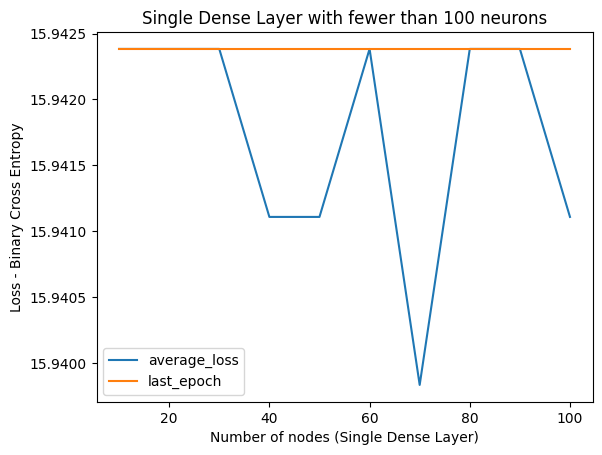

In [30]:
plt.plot(nodes, average_loss, label='average_loss')
plt.plot(nodes, last_loss, label='last_epoch')
plt.xlabel("Number of nodes (Single Dense Layer)")
plt.ylabel("Loss - Binary Cross Entropy")
plt.legend()
plt.title("Single Dense Layer with fewer than 100 neurons")

plt.show()



### Plotting Chosen Values Between 60 - 256 nodes

In [31]:
# parameters
batch_size = 500
num_epochs = 25

nodes = [64, 96, 128, 160, 256]
average_loss = []
last_loss = []


for i in nodes:
    model = build_model(i, user_input, item_input)
    avg, last = create_labels_and_train(users_final, products_final, model, batch_size, num_epochs)
    average_loss.append(avg)
    last_loss.append(last)

c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


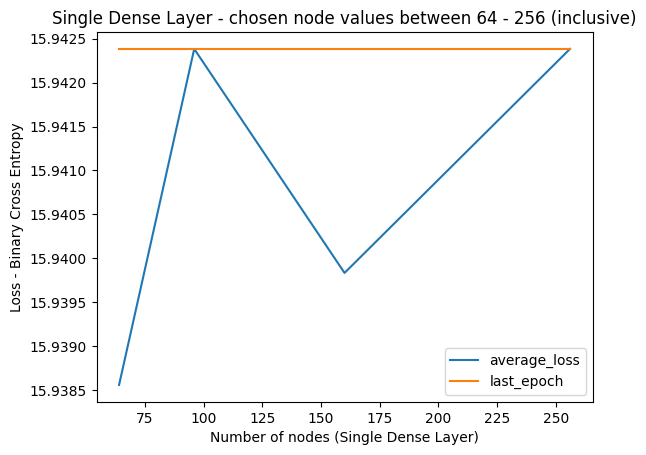

In [32]:
plt.plot(nodes, average_loss, label='average_loss')
plt.plot(nodes, last_loss, label='last_epoch')
plt.xlabel("Number of nodes (Single Dense Layer)")
plt.ylabel("Loss - Binary Cross Entropy")
plt.legend()
plt.title("Single Dense Layer - chosen node values between 64 - 256 (inclusive)")

plt.show()

### Nodes in the 60-80 range

Since there was a decrease in average loss between 60-80, focusing on this interval with finer granulrity might yield results. 

In [33]:
# parameters
batch_size = 500
num_epochs = 25

nodes = [60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80]
average_loss = []
last_loss = []


for i in nodes:
    model = build_model(i, user_input, item_input)
    avg, last = create_labels_and_train(users_final, products_final, model, batch_size, num_epochs)
    average_loss.append(avg)
    last_loss.append(last)

c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


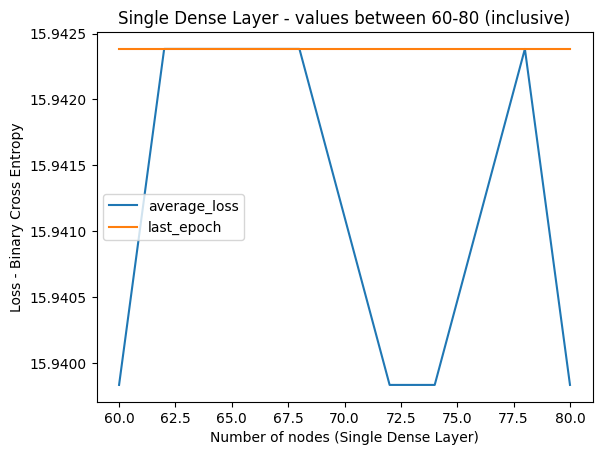

In [34]:
plt.plot(nodes, average_loss, label='average_loss')
plt.plot(nodes, last_loss, label='last_epoch')
plt.xlabel("Number of nodes (Single Dense Layer)")
plt.ylabel("Loss - Binary Cross Entropy")
plt.legend()
plt.title("Single Dense Layer - values between 60-80 (inclusive)")

plt.show()

### Nodes in the 100 - 150 Range

Since there was a decrease in average loss between 100-150, focusing on this interval with finer granulrity might yield results. 

In [35]:
# parameters
batch_size = 500
num_epochs = 25

nodes = [100,105,110,115, 120,125,130,135,140,145,150]
average_loss = []
last_loss = []


for i in nodes:
    model = build_model(i, user_input, item_input)
    avg, last = create_labels_and_train(users_final, products_final, model, batch_size, num_epochs)
    average_loss.append(avg)
    last_loss.append(last)

c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


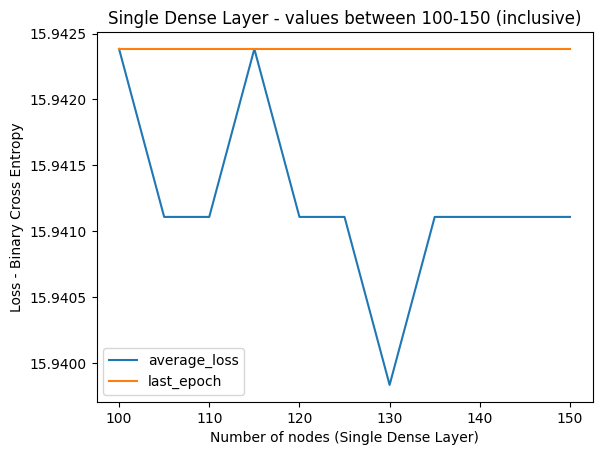

In [37]:
plt.plot(nodes, average_loss, label='average_loss')
plt.plot(nodes, last_loss, label='last_epoch')
plt.xlabel("Number of nodes (Single Dense Layer)")
plt.ylabel("Loss - Binary Cross Entropy")
plt.legend()
plt.title("Single Dense Layer - values between 100-150 (inclusive)")

plt.show()

## Nodes: 2 Layer Experiments

Redefining the build_model function to be suitable for a 2 layer model.

In [8]:
#2 Layer Experiments - redefining the build_model function to be suitable for a 2 layer model
def build_model_2layer(num_nodes1, num_nodes2, users, items):
    user_tower = Dense(num_nodes1, activation='relu')(users)
    user_tower = Dense(num_nodes2, activation='relu')(user_tower)

    item_tower = Dense(num_nodes1, activation='relu')(items)
    item_tower = Dense(num_nodes2, activation='relu')(item_tower)

    dot_product = Dot(axes=1)([user_tower, item_tower])
    model = Model(inputs=[users, items], outputs=dot_product)
    model.compile(optimizer='adam', loss='binary_crossentropy')

    return model

### Good Values for Nodes

In [11]:
# parameters
batch_size = 500
num_epochs = 25

nodes = [32,64,128,192,256,320,384]
average_loss = []
last_loss = []


for i in nodes:
    model = build_model_2layer(i, i//2, user_input, item_input)
    avg, last = create_labels_and_train(users_final, products_final, model, batch_size, num_epochs)
    average_loss.append(avg)
    last_loss.append(last)

c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


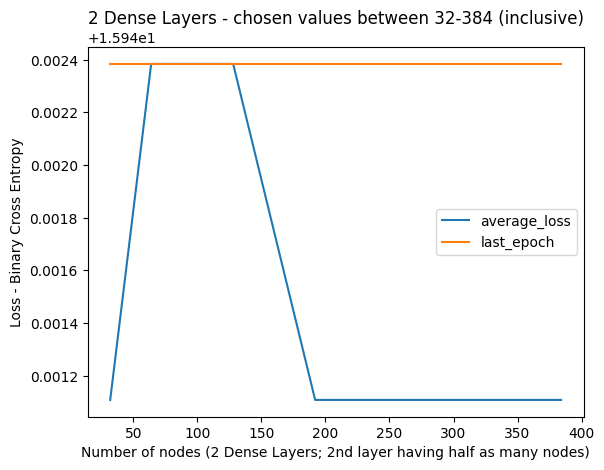

In [12]:
plt.plot(nodes, average_loss, label='average_loss')
plt.plot(nodes, last_loss, label='last_epoch')
plt.xlabel("Number of nodes (2 Dense Layers; 2nd layer having half as many nodes)")
plt.ylabel("Loss - Binary Cross Entropy")
plt.legend()
plt.title("2 Dense Layers - chosen values between 32-384 (inclusive)")

plt.show()

### Nodes in the 60-80 Range

The second layer in this case has half as many nodes as the first layer (computed using integer division).

In [40]:
# parameters
batch_size = 500
num_epochs = 25

nodes = [60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80]
average_loss = []
last_loss = []


for i in nodes:
    model = build_model_2layer(i, i//2, user_input, item_input)
    avg, last = create_labels_and_train(users_final, products_final, model, batch_size, num_epochs)
    average_loss.append(avg)
    last_loss.append(last)

c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


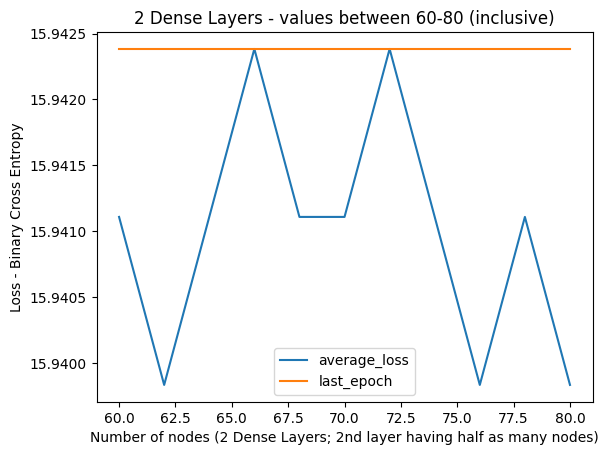

In [43]:
plt.plot(nodes, average_loss, label='average_loss')
plt.plot(nodes, last_loss, label='last_epoch')
plt.xlabel("Number of nodes (2 Dense Layers; 2nd layer having half as many nodes)")
plt.ylabel("Loss - Binary Cross Entropy")
plt.legend()
plt.title("2 Dense Layers - values between 60-80 (inclusive)")

plt.show()

### Nodes in the 100-150 Range

2 dense layers where the 2nd layer has half as many nodes as the first one.

In [ ]:
# parameters
batch_size = 500
num_epochs = 25

nodes = [100,105,110,115, 120,125,130,135,140,145,150]
average_loss = []
last_loss = []


for i in nodes:
    model = build_model_2layer(i, i//2, user_input, item_input)
    avg, last = create_labels_and_train(users_final, products_final, model, batch_size, num_epochs)
    average_loss.append(avg)
    last_loss.append(last)

c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


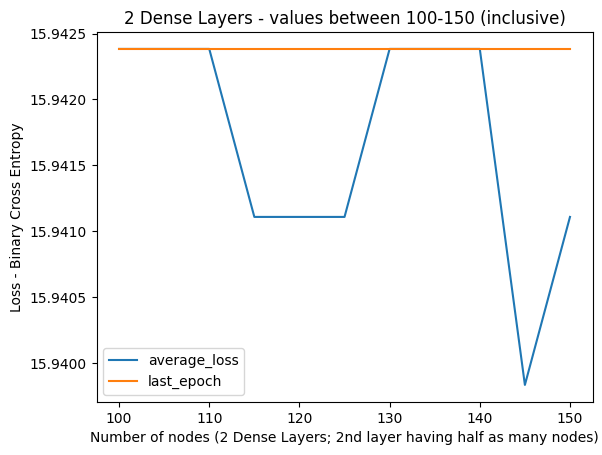

In [10]:
plt.plot(nodes, average_loss, label='average_loss')
plt.plot(nodes, last_loss, label='last_epoch')
plt.xlabel("Number of nodes (2 Dense Layers; 2nd layer having half as many nodes)")
plt.ylabel("Loss - Binary Cross Entropy")
plt.legend()
plt.title("2 Dense Layers - values between 100-150 (inclusive)")

plt.show()

## Exploring Batch Size: Single Layer

In [23]:
# parameters
batch_size = 500
num_epochs = 25

nodes = [60,80,72,73,130]
batch_size = [100,200,300,400,500]
average_loss = []


for b in batch_size:
    batch = []
    for i in nodes:
        model = build_model(i, user_input, item_input)
        avg, _ = create_labels_and_train(users_final, products_final, model, b, num_epochs)
        batch.append(avg)
    average_loss.append(batch)


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


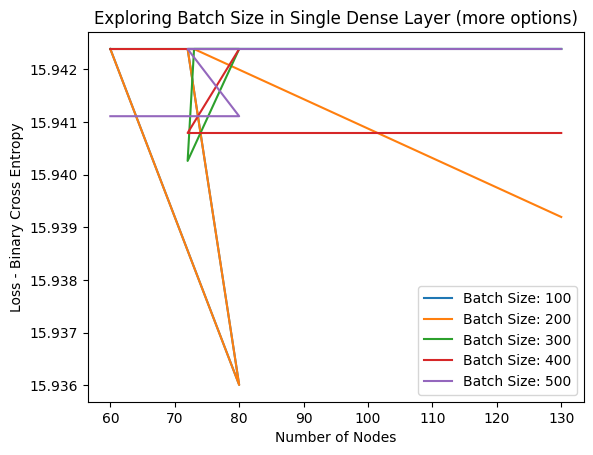

In [26]:
i = 0
while i < len(average_loss):
    plt.plot(nodes, average_loss[i], label=f"Batch Size: {batch_size[i]}")
    i += 1
plt.xlabel("Number of Nodes")
plt.ylabel("Loss - Binary Cross Entropy")
plt.legend()
plt.title("Exploring Batch Size in Single Dense Layer (more options)")

plt.show()

## Exploring Batch Size: Double Layer

In [27]:
# parameters
batch_size = 500
num_epochs = 25

nodes = [62,76,145]
batch_size = [100,200,300,400,500]
average_loss = []


for b in batch_size:
    batch = []
    for i in nodes:
        model = build_model_2layer(i, i//2, user_input, item_input)
        avg, _ = create_labels_and_train(users_final, products_final, model, b, num_epochs)
        batch.append(avg)
    average_loss.append(batch)


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


c:\Users\asmi_\Asmi's Documents\Academics\2022-26_UCLA\Projects\amex\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Done


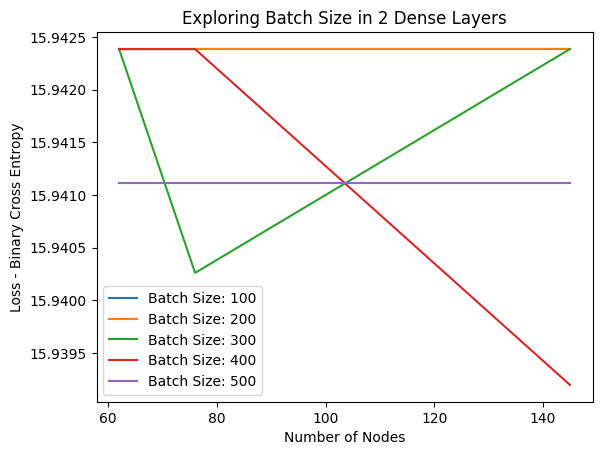

In [28]:
i = 0
while i < len(average_loss):
    plt.plot(nodes, average_loss[i], label=f"Batch Size: {batch_size[i]}")
    i += 1
plt.xlabel("Number of Nodes")
plt.ylabel("Loss - Binary Cross Entropy")
plt.legend()
plt.title("Exploring Batch Size in 2 Dense Layers")

plt.show()